Data Set: https://www.kaggle.com/datasets/moltean/fruits

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_path="fruits-360/Training/"
test_path="fruits-360/Test/"

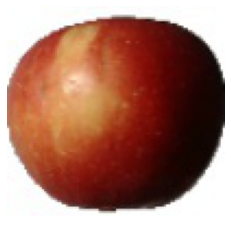

In [5]:
img=load_img(train_path+"Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [7]:
x=img_to_array(img)
x.shape

(100, 100, 3)

In [12]:
from glob import *
className=glob(train_path+"/*")
numberOfClass=len(className)
numberOfClass

131

In [23]:
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(100,100,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())


model.add(Conv2D(32,(3,3),input_shape=(100,100,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())


model.add(Conv2D(64,(3,3),input_shape=(100,100,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())


model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])
batch_size=32

In [24]:
m=glob(train_path+"/Apple Braeburn"+"/*")
len(m)

492

## Data Generation - TRAIN-TEST

In [31]:
trainData_generator=ImageDataGenerator(rescale=1/255.0,
                  shear_range=0.3,
                  horizontal_flip=True,
                   zoom_range=0.3)
testData_generator=ImageDataGenerator(rescale=1/255.0)

train_data=trainData_generator.flow_from_directory(train_path,
                                                   target_size=x.shape[:2],
                                                  batch_size=batch_size,
                                                  color_mode="rgb",
                                                  class_mode="categorical")

test_data=testData_generator.flow_from_directory(test_path,
                                                  target_size=x.shape[:2],
                                                  batch_size=batch_size,
                                                  color_mode="rgb",
                                                  class_mode="categorical")

hist=model.fit_generator(generator=train_data,
                    steps_per_epoch=1600//batch_size,
                   epochs=100,
                   validation_data=test_data,
                   validation_steps=800//batch_size)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
Epoch 1/100


C:\Users\HILAL~1.YUK\AppData\Local\Temp/ipykernel_6820/519150061.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(generator=train_data,


50/50 [==============================] - 16s 318ms/step - loss: 0.1334 - accuracy: 0.9600 - val_loss: 0.1177 - val_accuracy: 0.9762
Epoch 2/100
50/50 [==============================] - 16s 323ms/step - loss: 0.1314 - accuracy: 0.9594 - val_loss: 0.1430 - val_accuracy: 0.9675
Epoch 3/100
50/50 [==============================] - 15s 306ms/step - loss: 0.1222 - accuracy: 0.9669 - val_loss: 0.2838 - val_accuracy: 0.9500
Epoch 4/100
50/50 [==============================] - 15s 294ms/step - loss: 0.1585 - accuracy: 0.9519 - val_loss: 0.3991 - val_accuracy: 0.9300
Epoch 5/100
50/50 [==============================] - 15s 291ms/step - loss: 0.1388 - accuracy: 0.9663 - val_loss: 0.2504 - val_accuracy: 0.9600
Epoch 6/100
50/50 [==============================] - 15s 296ms/step - loss: 0.1250 - accuracy: 0.9644 - val_loss: 0.1517 - val_accuracy: 0.9688
Epoch 7/100
50/50 [==============================] - 15s 294ms/step - loss: 0.1137 - accuracy: 0.9694 - val_loss: 0.2775 - val_accuracy: 0.9250
Epoc

## MODEL SAVE

In [32]:
model.save_weights("First")

## MODEL EVALUATION

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


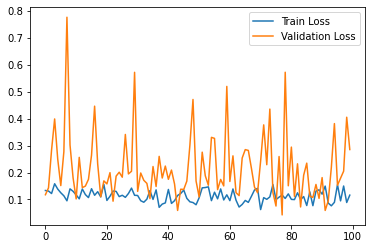

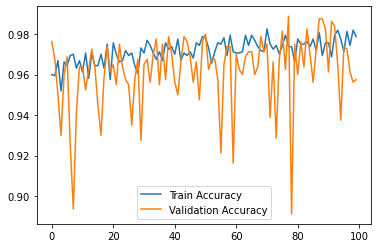

In [40]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label="Train Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.legend();
plt.figure()
plt.plot(hist.history["accuracy"],label="Train Accuracy")
plt.plot(hist.history["val_accuracy"],label="Validation Accuracy")
plt.legend();

## SAVE HISTORY

In [36]:
import json
with open("cnn_fruit_hist.json","w") as f:
    json.dump(hist.history,f)

## LOAD HISTORY

In [39]:
import codecs
with codecs.open("cnn_fruit_hist.json","r",encoding="utf-8") as f:
    h=json.loads(f.read())

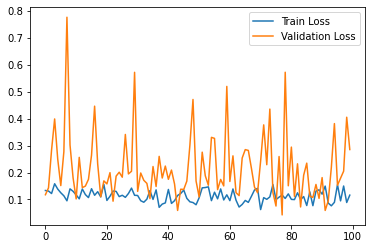

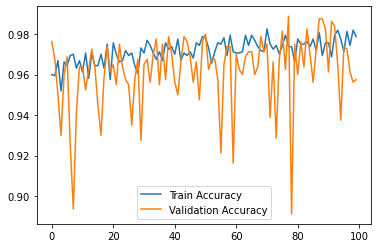

In [41]:
plt.plot(h["loss"],label="Train Loss")
plt.plot(h["val_loss"],label="Validation Loss")
plt.legend();
plt.figure()
plt.plot(h["accuracy"],label="Train Accuracy")
plt.plot(h["val_accuracy"],label="Validation Accuracy")
plt.legend();